In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
# Load the dataset
file_path = "/content/sample_data/milk_quality_dataset.csv"  # Replace with your dataset's path if different
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.head())
print(data.info())


     pH  Fat_Content (%)  Protein_Content (%)  Lactose_Content (%)  \
0  6.94             5.29                 2.78                 4.78   
1  8.38             4.64                 3.31                 4.72   
2  7.83             3.74                 3.81                 4.04   
3  7.50             5.76                 3.60                 4.51   
4  6.39             5.24                 3.71                 4.57   

   SNF_Content (%)  Density (kg/m³)  Temperature (°C) Quality  
0             8.65           1033.3               8.0    High  
1             8.62           1032.6               8.8     Low  
2            10.27           1030.7               5.5  Medium  
3             8.62           1034.6               7.7    High  
4             8.68           1027.0               7.4     Low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -------------- 

In [6]:
# Check for missing values
print(data.isnull().sum())

# Optional: Handle missing values if any
# Example: data.fillna(method='ffill', inplace=True)

# Encode the quality column if it's categorical
if data['Quality'].dtype == 'object':
    data['Quality'] = data['Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})


pH                     0
Fat_Content (%)        0
Protein_Content (%)    0
Lactose_Content (%)    0
SNF_Content (%)        0
Density (kg/m³)        0
Temperature (°C)       0
Quality                0
dtype: int64


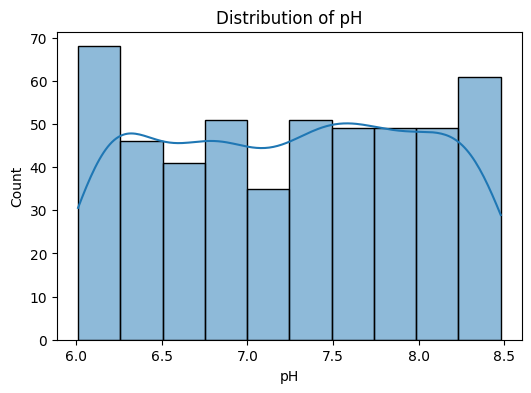

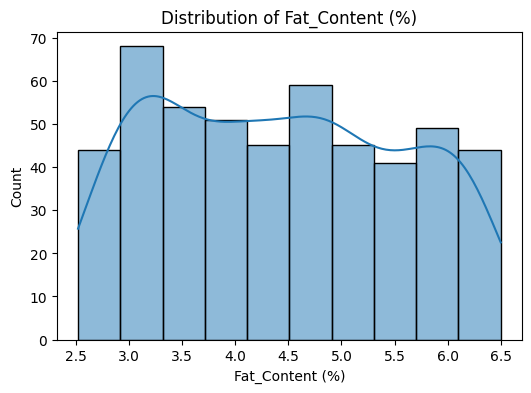

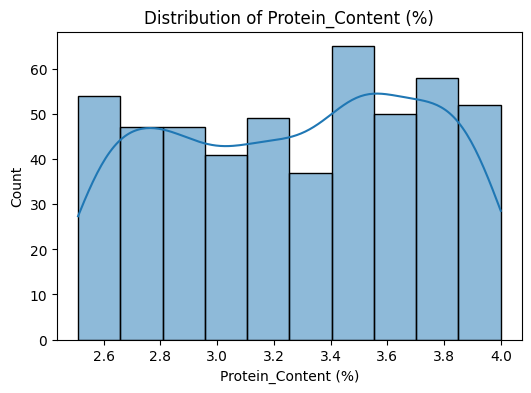

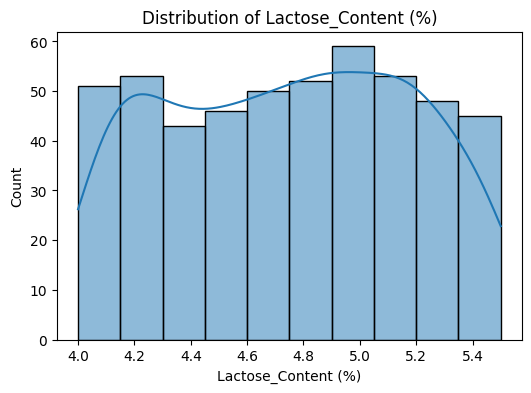

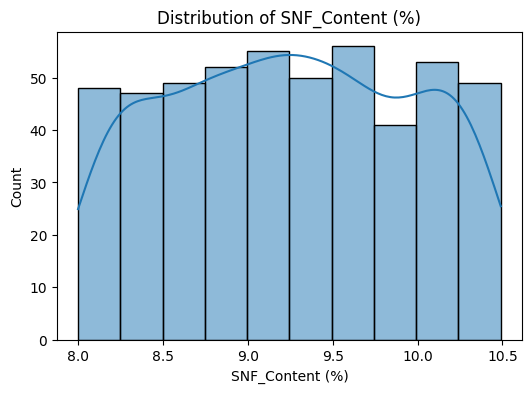

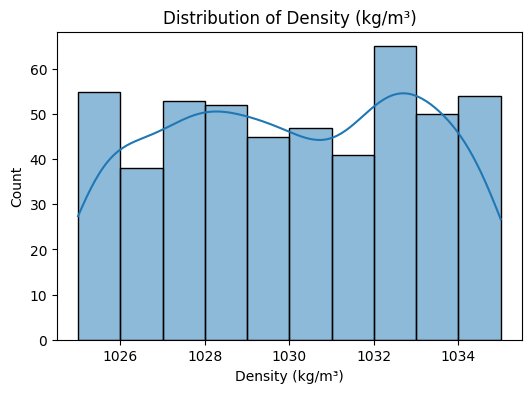

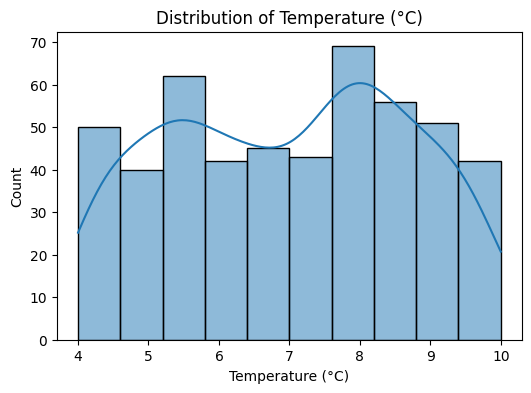

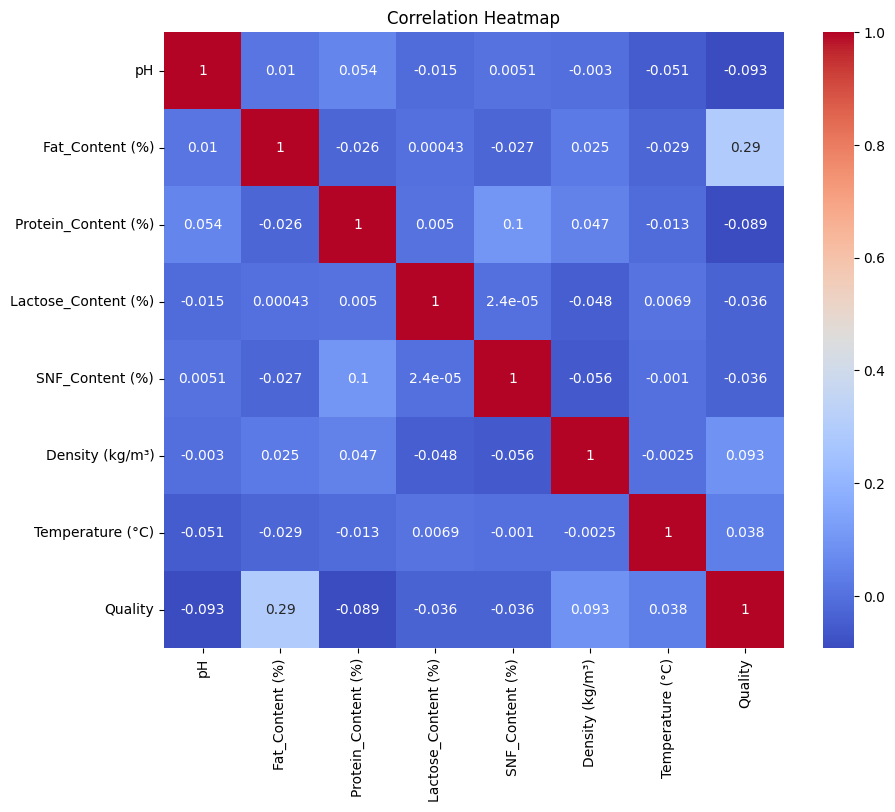

In [7]:
# Plot distributions of numerical columns
for col in data.columns[:-1]:  # Skip the "Quality" column
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Define features (X) and target (y)
X = data.drop(columns=['Quality'])
y = data['Quality']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (400, 7)
Test set size: (100, 7)


In [9]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Display performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.92      0.96        25
           2       1.00      1.00      1.00        26

    accuracy                           0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix:
 [[49  0  0]
 [ 2 23  0]
 [ 0  0 26]]


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# Function to classify milk grades
def classifyMilk(milk, labels):
    # Encode the grades as one-hot vectors
    grade = pd.get_dummies(milk["Quality"])  # Convert Quality to dummy variables

    # Drop the target column (Quality) from features
    characteristics = milk.drop(columns=["Quality"])  # Adjusted to reflect the dataset setup

    # Split the dataset into training and testing sets
    charaTrain, charaTest, gradeTrain, gradeTest = train_test_split(
        characteristics, grade, test_size=0.2, random_state=42
    )

    # Create and train the Random Forest model
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(charaTrain, gradeTrain)

    # Make predictions on the test and training sets
    predict_test = forest.predict(charaTest)
    predict_train = forest.predict(charaTrain)

    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(gradeTrain, predict_train)
    test_accuracy = accuracy_score(gradeTest, predict_test)

    # Convert predictions and ground truth to numeric values for RMSE calculation
    gradeTest_numeric = gradeTest.to_numpy(dtype=float)  # Convert to numeric NumPy array
    predict_numeric = np.array(predict_test, dtype=float)  # Ensure predictions are numeric

    # Print accuracies
    print("Training Accuracy: ", train_accuracy)
    print("Test Accuracy: ", test_accuracy)

    # Print Root Mean Square Error
    print("Root Mean Square Error: ", np.sqrt(mean_squared_error(gradeTest_numeric, predict_numeric)))

    # Print classification report
    print("Classification Report:\n", classification_report(gradeTest, predict_test, target_names=labels))

    # Print the most important characteristics
    getChara(characteristics, forest)
    return forest

# Function to display feature importance
def getChara(characteristics, model):
    # Extract feature importance from the trained model
    feature_importance = model.feature_importances_

    # Create a DataFrame to map features with their importance values
    importance_df = pd.DataFrame({
        'Feature': characteristics.columns,
        'Importance': feature_importance
    })

    # Sort the features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Print the most important features
    print("According to the Random Forest, the most important factors for milk grade are:")
    print(importance_df)

# Main driver code
if __name__ == "__main__":
    # Load the dataset
    file_path = "/content/sample_data/milk_quality_dataset.csv"  # Adjust the file path if needed
    milk = pd.read_csv(file_path)

    # Ensure column names are consistent with this code
    grade_labels = ["Low", "Medium", "High"]  # Define grade labels
    model = classifyMilk(milk, grade_labels)  # Classify milk grades


Training Accuracy:  1.0
Test Accuracy:  0.98
Root Mean Square Error:  0.11547005383792516
Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        26
      Medium       0.96      1.00      0.98        49
        High       1.00      0.92      0.96        25

   micro avg       0.98      0.98      0.98       100
   macro avg       0.99      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100
 samples avg       0.98      0.98      0.98       100

According to the Random Forest, the most important factors for milk grade are:
               Feature  Importance
0                   pH    0.565184
1      Fat_Content (%)    0.171102
5      Density (kg/m³)    0.058893
2  Protein_Content (%)    0.055714
4      SNF_Content (%)    0.054113
6     Temperature (°C)    0.047665
3  Lactose_Content (%)    0.047329


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# Function to classify milk grades
def classifyMilk(milk, labels):
    # Encode the grades as one-hot vectors
    grade = pd.get_dummies(milk["Quality"])  # Convert Quality to dummy variables

    # Drop the target column (Quality) from features
    characteristics = milk.drop(columns=["Quality"])

    # Split the dataset into training and testing sets
    charaTrain, charaTest, gradeTrain, gradeTest = train_test_split(
        characteristics, grade, test_size=0.2, random_state=42
    )

    # Create and train the Random Forest model
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(charaTrain, gradeTrain)

    # Print training and test accuracies
    print("Training Accuracy: ", forest.score(charaTrain, gradeTrain))
    print("Test Accuracy: ", forest.score(charaTest, gradeTest))

    # Print the most important characteristics
    getChara(characteristics, forest)
    return forest

# Function to display feature importance
def getChara(characteristics, model):
    # Extract feature importance from the trained model
    feature_importance = model.feature_importances_

    # Create a DataFrame to map features with their importance values
    importance_df = pd.DataFrame({
        'Feature': characteristics.columns,
        'Importance': feature_importance
    })

    # Sort the features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Print the most important features
    print("According to the Random Forest, the most important factors for milk grade are:")
    print(importance_df)

# Function to predict milk quality based on user input
def predictMilkQuality(model, labels):
    # Take user input for all attributes
    user_input = {
        'pH': float(input("Enter the pH value (e.g., 6.5 to 7.5) = ")),
        'Fat_Content (%)': float(input("Enter the Fat Content (%) (e.g., 3.0 to 4.0) = ")),
        'Protein_Content (%)': float(input("Enter the Protein Content (%) (e.g., 3.2 to 3.8) = ")),
        'Lactose_Content (%)': float(input("Enter the Lactose Content (%) (e.g., 4.5 to 5.2) = ")),
        'SNF_Content (%)': float(input("Enter the SNF Content (%) (e.g., 8.5 to 9.5) = ")),
        'Density (kg/m³)': float(input("Enter the Density (kg/m³) (e.g., 1027 to 1033) = ")),
        'Temperature (°C)': float(input("Enter the Temperature (°C) (e.g., 34 to 40) = "))
    }

    # Convert the user input into a DataFrame
    user_df = pd.DataFrame([user_input])

    # Predict the milk grade
    prediction = model.predict(user_df)
    predicted_label = labels[np.argmax(prediction)]

    print(f"The predicted quality of the milk is: {predicted_label}")

# Main driver code
if __name__ == "__main__":
    # Load the dataset
    file_path = "/content/sample_data/milk_quality_dataset.csv"  # Adjust the file path if needed
    milk = pd.read_csv(file_path)

    # Ensure column names are consistent with this code
    grade_labels = ["Low", "Medium", "High"]  # Define grade labels
    model = classifyMilk(milk, grade_labels)  # Classify milk grades

    # Take user input and predict milk quality
    predictMilkQuality(model, grade_labels)


Training Accuracy:  1.0
Test Accuracy:  0.98
According to the Random Forest, the most important factors for milk grade are:
               Feature  Importance
0                   pH    0.565184
1      Fat_Content (%)    0.171102
5      Density (kg/m³)    0.058893
2  Protein_Content (%)    0.055714
4      SNF_Content (%)    0.054113
6     Temperature (°C)    0.047665
3  Lactose_Content (%)    0.047329
Enter the pH value (e.g., 6.5 to 7.5) = 7
Enter the Fat Content (%) (e.g., 3.0 to 4.0) = 3.4
Enter the Protein Content (%) (e.g., 3.2 to 3.8) = 3.3
Enter the Lactose Content (%) (e.g., 4.5 to 5.2) = 4.9
Enter the SNF Content (%) (e.g., 8.5 to 9.5) = 8.8
Enter the Density (kg/m³) (e.g., 1027 to 1033) = 1030
Enter the Temperature (°C) (e.g., 34 to 40) = 37
The predicted quality of the milk is: High


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Load the dataset
file_path = "/content/sample_data/milk_quality_dataset.csv"  # Adjust the file path if needed
df = pd.read_csv(file_path)

# Assuming 'Quality' is the target column and the rest are features
X = df.drop(columns=['Quality'])
y = df['Quality']

# Function to convert class labels to numerical format (if not already numeric)
def convert_class_labels(class_label):
    if class_label == "Low":
        return 1  # Low -> Class 1
    elif class_label == "Medium":
        return 2  # Medium -> Class 2
    elif class_label == "High":
        return 3  # High -> Class 3
    else:
        return class_label  # In case of unexpected labels

# Apply label conversion
y = y.apply(convert_class_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the first tree in the Random Forest
first_tree = rf_model.estimators_[0]

# Get the text representation of the first decision tree
tree_rules = export_text(first_tree, feature_names=list(X.columns))
print("First tree rules:")
print(tree_rules)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


First tree rules:
|--- SNF_Content (%) <= 8.74
|   |--- Protein_Content (%) <= 2.94
|   |   |--- Density (kg/m³) <= 1026.70
|   |   |   |--- class: 0.0
|   |   |--- Density (kg/m³) >  1026.70
|   |   |   |--- Protein_Content (%) <= 2.88
|   |   |   |   |--- SNF_Content (%) <= 8.46
|   |   |   |   |   |--- pH <= 6.38
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- pH >  6.38
|   |   |   |   |   |   |--- Lactose_Content (%) <= 4.02
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Lactose_Content (%) >  4.02
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- SNF_Content (%) >  8.46
|   |   |   |   |   |--- Density (kg/m³) <= 1031.40
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Density (kg/m³) >  1031.40
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- Protein_Content (%) >  2.88
|   |   |   |   |--- class: 0.0
|   |--- Protein_Content (%) >  2.94
|   |   |--- Fat_Content (%) <= 3.08
|   |   |   |--- class: 

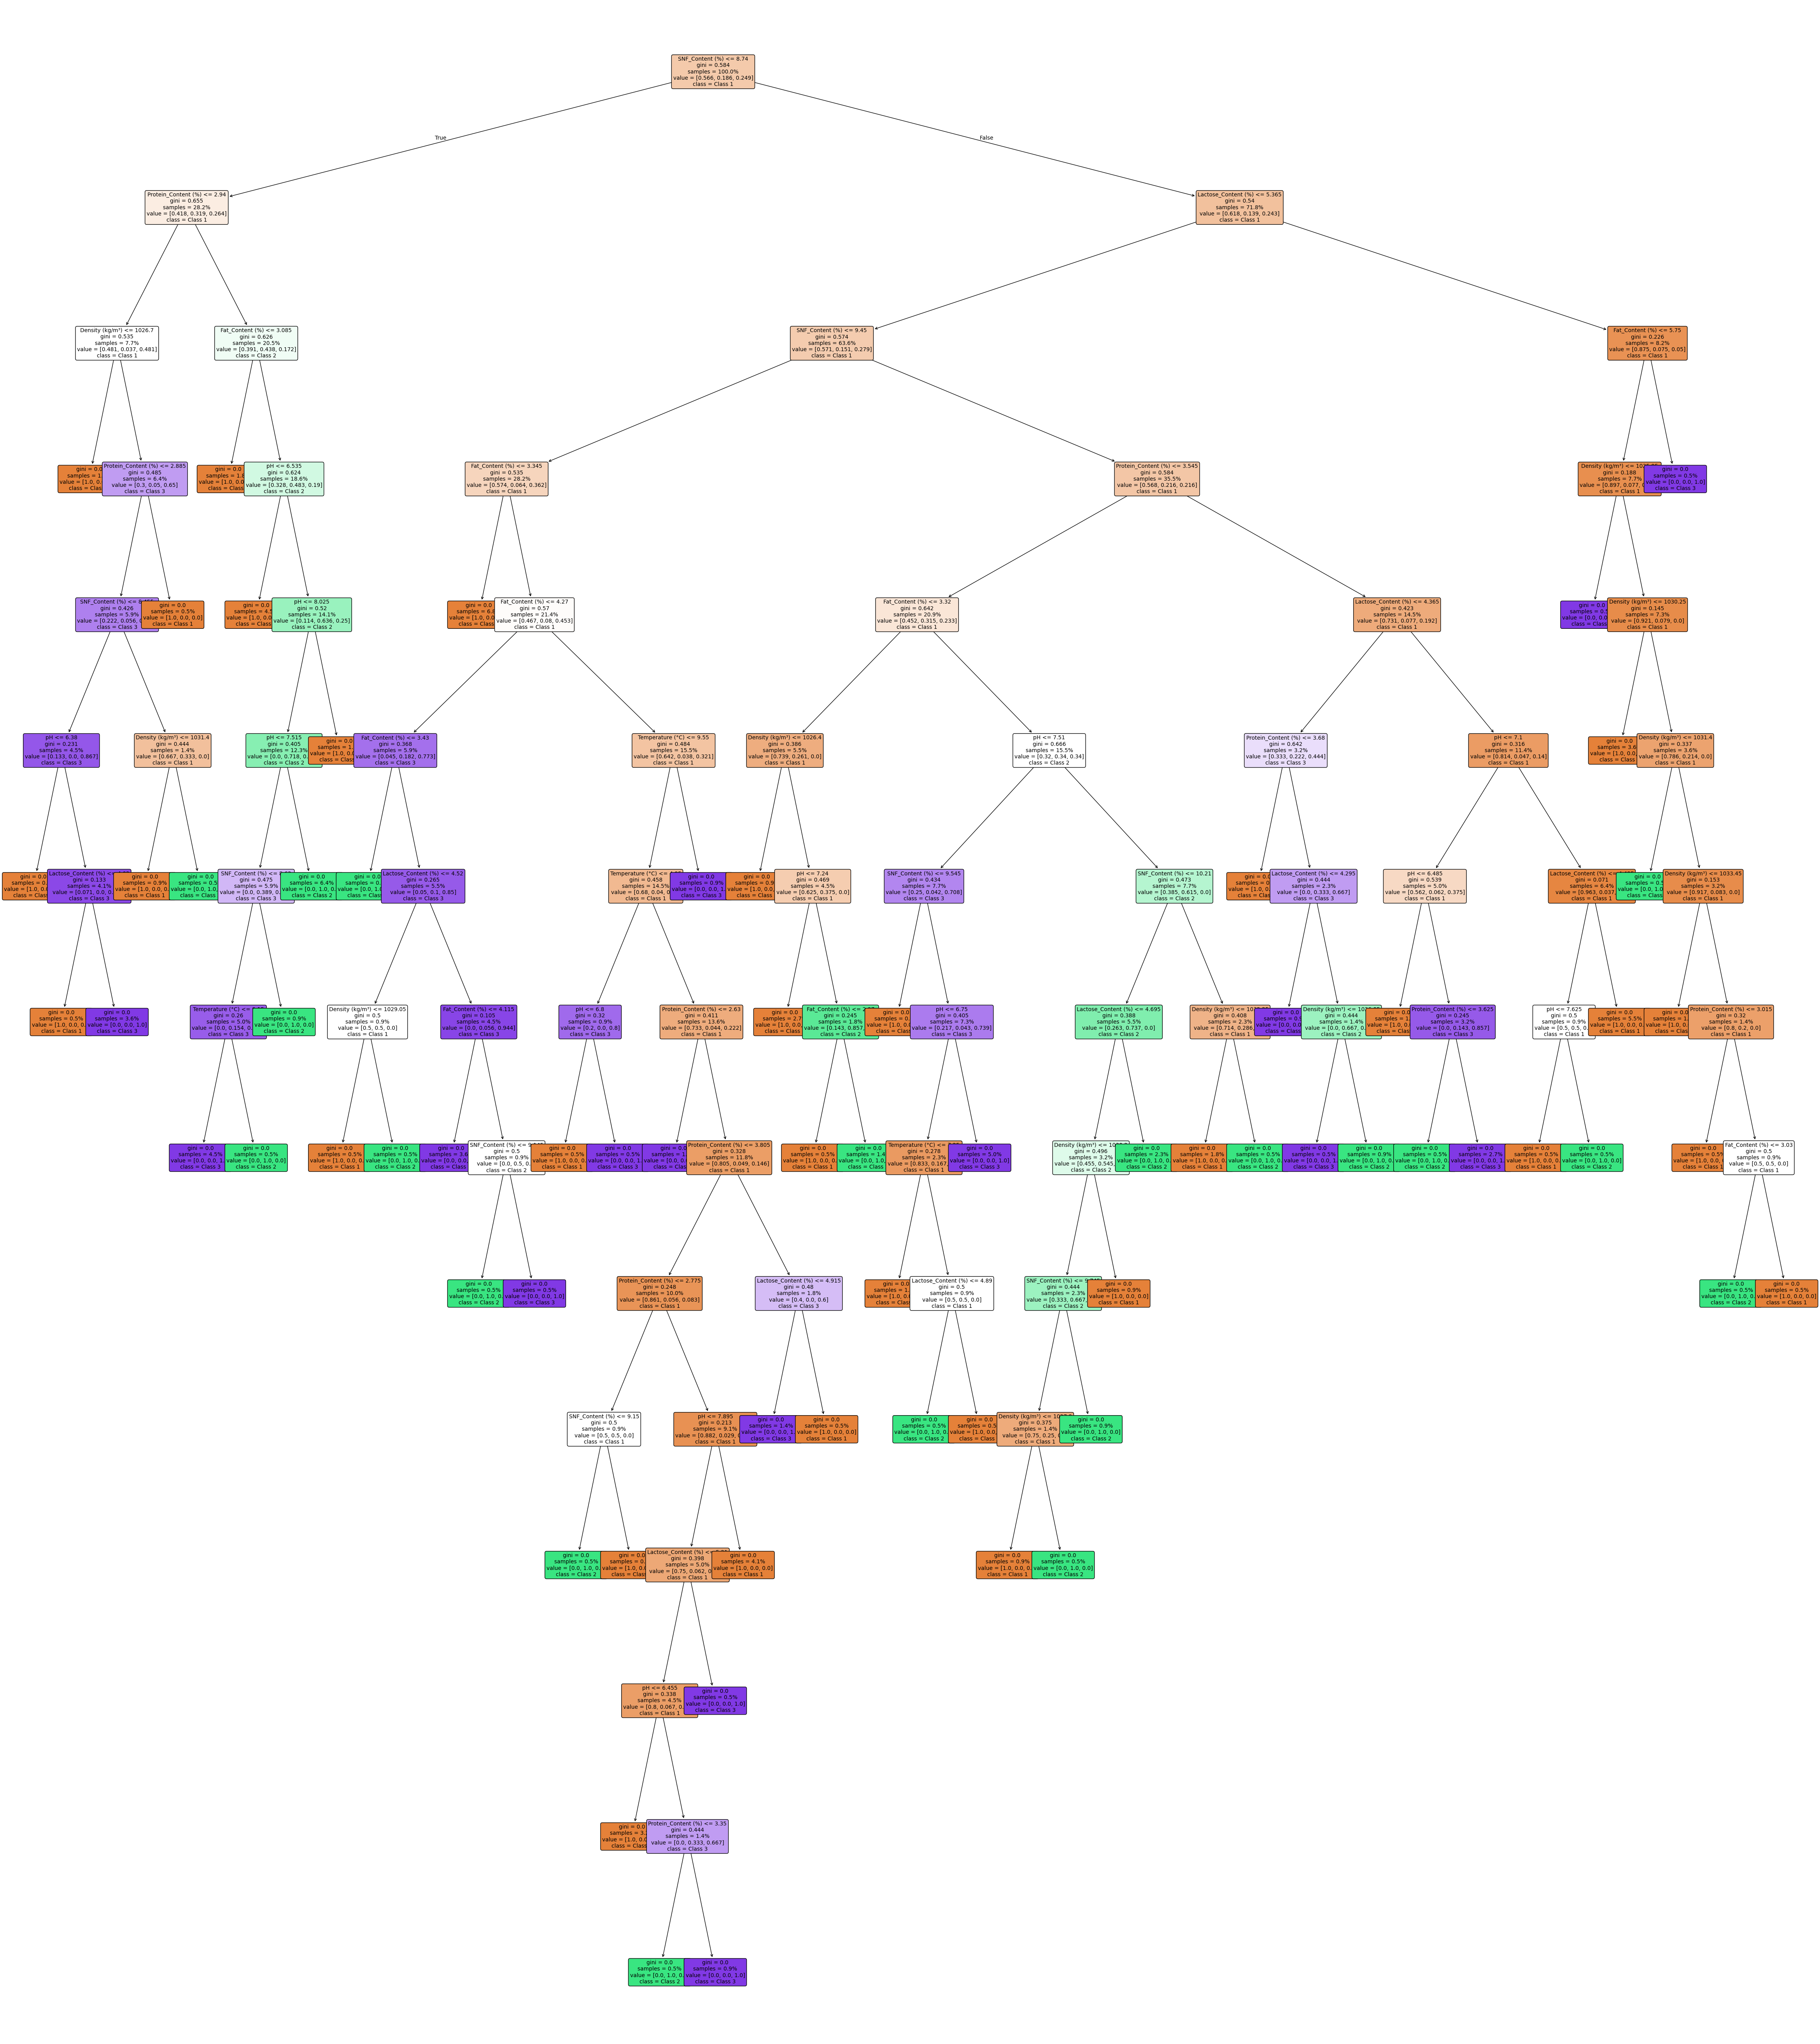

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the first tree in the Random Forest
first_tree = rf_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(60, 68))  # Increase figure size
plot_tree(first_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Class 1', 'Class 2', 'Class 3'],  # Use the correct class names
          fontsize=10,  # Increase font size for readability
          rounded=True,
          proportion=True,
          )  # Limit the depth for better clarity
plt.show()
